# task 1 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

data = pd.read_excel("task_data.xlsx")


# Determine the top three most common cuisines in the dataset.

In [44]:
top_cuisines = data.groupby("Cuisines").agg({"Restaurant ID":"count"}).sort_values("Restaurant ID", ascending = False)

top_cuisines = top_cuisines.rename(columns = {"Restaurant ID": "Total Restaurants"})

print(top_cuisines.head(3))

                       Total Restaurants
Cuisines                                
North Indian                         936
North Indian, Chinese                511
Chinese                              354


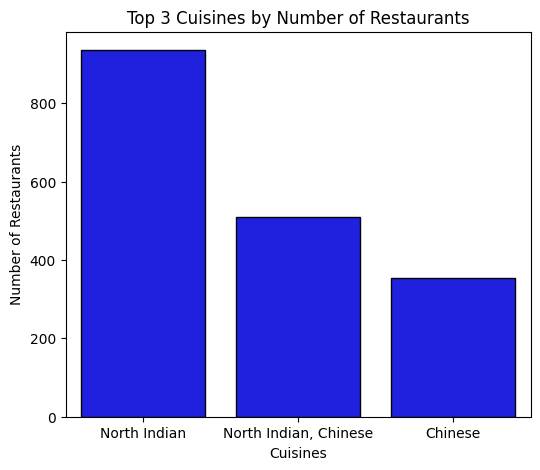

In [54]:
top_3_cuisines = top_cuisines.head(3)

plt.figure(figsize=(6,5))

sns.barplot(data = top_3_cuisines, x = "Cuisines", y = "Total Restaurants",color = "blue", edgecolor = "black")
plt.xlabel("Cuisines")
plt.ylabel("Number of Restaurants")
plt.title("Top 3 Cuisines by Number of Restaurants")

plt.show()

# Calculate the percentage of restaurants that serve each of the top cuisines.

In [10]:
top_cuisines = data["Cuisines"].value_counts().head(3)

total_restaurants = data["Restaurant ID"].count()

top_cuisines_percentage = (top_cuisines / total_restaurants) * 100

top_cuisines_percentage = top_cuisines_percentage.round(2)

print(top_cuisines_percentage)

Cuisines
North Indian             9.82
North Indian, Chinese    5.36
Fast Food                3.71
Name: count, dtype: float64


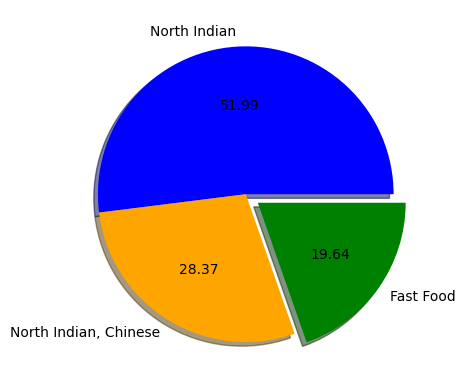

In [53]:
c = ["blue","orange","green"]

ex = [0,0,0.1]
plt.pie(top_cuisines_percentage.values, labels = top_cuisines_percentage.index, colors = c, shadow = True, explode = ex, autopct = "%.2f")
plt.show()

# task 2 

# Identify the city with the highest number of restaurants in the dataset

In [35]:
data = pd.read_excel("task_data.xlsx")

city_with_most_restaurants = data.groupby("City").agg({"Restaurant ID":"count"}).sort_values("Restaurant ID", ascending=False)

print(city_with_most_restaurants.head(1))

           Restaurant ID
City                    
New Delhi           5472


# Calculate the average rating for restaurants in each city.

In [5]:
Avg_rating_of_res = data.groupby("City").agg({"Aggregate rating":"mean"})

Avg_rating_of_res = Avg_rating_of_res.round(1)
print(Avg_rating_of_res)

                 Aggregate rating
City                             
Abu Dhabi                     4.3
Agra                          4.0
Ahmedabad                     4.2
Albany                        3.6
Allahabad                     3.4
...                           ...
Weirton                       3.9
Wellington City               4.2
Winchester Bay                3.2
Yorkton                       3.3
��stanbul                     4.3

[140 rows x 1 columns]


# Determine the city with the highest average rating.

In [54]:
import pandas as pd

data = pd.read_excel("task_data.xlsx")

highest_rating_city = data.groupby("City").agg({"Aggregate rating":"mean"}).sort_values("Aggregate rating", ascending = False)

print(highest_rating_city.head(1))


            Aggregate rating
City                        
Inner City               4.9


# task 3

# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

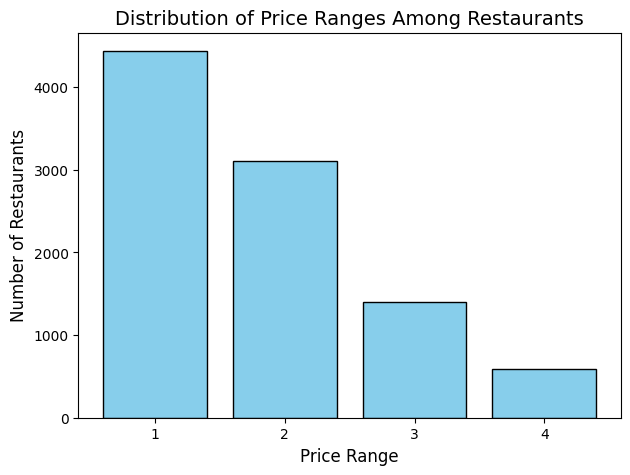

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("task_data.xlsx")

price_range_distribution = data.groupby("Price range").agg({"Restaurant ID": "count"}).reset_index()
# print(price_range_distribution)

price_range_distribution.columns = ["Price Range", "Count"]

plt.figure(figsize = (7,5))
plt.bar(price_range_distribution["Price Range"], price_range_distribution["Count"], color='skyblue', edgecolor='black',)
plt.title("Distribution of Price Ranges Among Restaurants", fontsize=14)
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)

plt.xticks(price_range_distribution["Price Range"])

plt.show()


# Calculate the percentage of restaurants in each price range category.


In [68]:
total_restaurants = data["Restaurant ID"].count()

Restaurant_price_range = data.groupby("Price range").agg({"Restaurant ID": "count"})

price_range_distribution["Percentage"] = (Restaurant_price_range["Restaurant ID"] / total_restaurants) * 100

# Rename columns for clarity
price_range_distribution.columns = ["Count", "Percentage"]

print(price_range_distribution)


             Count  Percentage
Price range                   
1             4437   46.528943
2             3109   32.602768
3             1405   14.733641
4              585    6.134648


# task 4 

# Determine the percentage of restaurants that offer online delivery.

In [46]:
import pandas as pd

data = pd.read_excel("task_data.xlsx")

total_restaurants = data["Restaurant ID"].count()

online_delivery_count = data[data["Has Online delivery"] == "Yes"]["Restaurant ID"].count()

percentage_online_delivery = (online_delivery_count / total_restaurants)* 100

print(f"Percentage of restaurants offering online delivery: {percentage_online_delivery:.2f}%")

Percentage of restaurants offering online delivery: 25.69%


# Compare the average ratings of restaurants with and  without online delivery.

In [63]:
Avg_rating = data.groupby("Has Online delivery").agg({"Aggregate rating": "mean"}).reset_index()

Avg_rating.columns = ["Has Online Delivery", "Average rating"]

Avg_rating["Average rating"] = Avg_rating["Average rating"].round(2)

print(Avg_rating)


  Has Online Delivery  Average rating
0                  No            2.46
1                 Yes            3.25
